In [68]:
# Aim: Write program to implement Naive bais with gaussian dist.
# Read the training data from a .csv file

import pandas as pd
import numpy as np
from copy import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [69]:
data = pd.read_csv(r'Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [70]:
# accessing attribute columns

attribute = data.iloc[:,:-1]
attribute = np.array(attribute)
# attribute

In [71]:
# Accessing target columns

target = data.iloc[:,-1:]
target = np.array(target)
#target

In [72]:
# splitting dataset into train and test data sets

X_train,X_test,y_train,y_test = train_test_split(attribute, target,test_size=0.1,random_state=1)

In [73]:
# preprocesing of data

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# X_train

In [74]:
# X_test

In [75]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
classifier

Z:\ml\ml\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [76]:
# predicintg result
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [77]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

In [78]:
accuracy_score(y_test,y_pred)

0.875

In [79]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[21,  4],
       [ 1, 14]], dtype=int64)

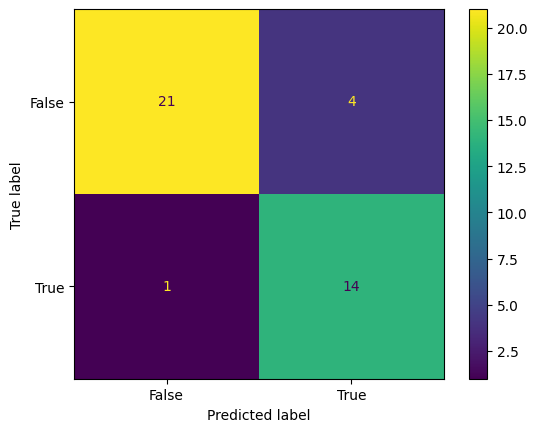

In [80]:
# Print the confusion matrix using Matplotlib

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

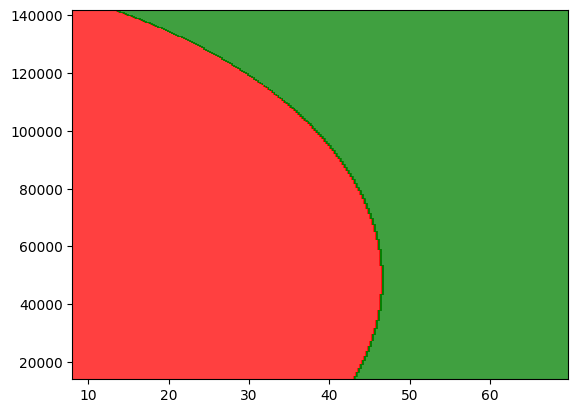

In [81]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 
10, step = 0.25),
np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 
1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), 
X2.ravel()]).T)).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
    
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
